In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##Data Preprocessing 


In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

##Text Preprocessing

In [7]:
import re
import string

In [8]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

##Remove Link


In [11]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE) for x in x.split()))

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

##Remove punctuations


In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuation)

In [15]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

##Remove Numbers

In [16]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)


In [17]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

##Remove stop word

In [18]:
!pip install nltk


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk

In [20]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [24]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

##Stemming 

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [26]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [27]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data


,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


##Building Vacabulary


In [29]:
from collections import Counter
vocab = Counter()

In [30]:
vocab.update(['Java','Python','Python','c++'])

In [31]:
vocab


Counter({'Python': 2, 'Java': 1, 'c++': 1})

In [32]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [33]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [34]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 756,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 456,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 383,
         'io': 383,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 283,
         'got': 280,
         'fun': 277,
         'news': 265,
         'music': 264,
         'thank': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [35]:
len(vocab)

15899

In [36]:
data.shape

(7920, 3)

In [37]:
tokens = [key for key in vocab if vocab[key] > 10]

In [38]:
len(tokens)

1146

In [39]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    with open(filename, 'w', encoding="utf-8") as file:
        file.write(data)

save_vocabulary(tokens, '../static/model/vocabulary.txt')


##Divide dataset 

In [40]:
data


,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [41]:
x = data['tweet']
y = data['label']

In [42]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
 from sklearn.model_selection import train_test_split
 x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
x_train.shape

(6336,)

In [46]:
x_test.shape

(1584,)

In [47]:
y_train

7411    0
7881    0
6130    0
7244    1
4045    0
       ..
3038    0
3026    0
2904    0
4665    1
7106    0
Name: label, Length: 6336, dtype: int64

In [48]:
y_test

6292    0
5726    1
7759    1
3876    0
7586    1
       ..
7130    1
3654    1
5522    0
7088    0
5958    0
Name: label, Length: 1584, dtype: int64

In [49]:
x_train

7411    like smell may summer spring iphon cute cat pe...
7881    ⓒ final found one fit phone iphon despciabl ca...
6130    wna shhhd kuwait qig iphon iphonesia indtspl...
7244    headphon arent loud enough firstworldproblem d...
4045    amaz tree uk gener pictur good god nice day fa...
                              ...                        
3038    happi i mubarrak one day one chord progress ii...
3026    smile teengirl eye hai ugli soni style fashion...
2904    rock bit big jack uk gener pictur good god nic...
4665    cant believ taken hour convert song rington ai...
7106             new babe life appl ipad nant mac student
Name: tweet, Length: 6336, dtype: object

In [50]:
x_test

6292    harley son babi boy hk smile everyth cute inst...
5726    huge tv fell earlier today thank walmart tv sa...
7759    appl map suck googl wouldnt releas nativ io ma...
3876    like case transpar soft tpu case iphon x plu s...
7586        hey appl isnt like trade ipod like phone scam
                              ...                        
7130    gregori cant iphon block number call everi day...
3654              dang appl kinda make want ipad ugh appl
5522    like final chang phone use year iphon samsung ...
7088    empti bu ride iphoneographi iphon instagram ip...
5958    good morn great week everyon beauti beauti sex...
Name: tweet, Length: 1584, dtype: object

###Vectorization 

In [51]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)

    return vectorized_list_new

In [52]:
vectorized_x_train = vectorizer(x_train, tokens)

In [53]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
vectorized_x_train[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [55]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [56]:
vectorized_x_test = vectorizer(x_test, tokens)

In [57]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
y_train

7411    0
7881    0
6130    0
7244    1
4045    0
       ..
3038    0
3026    0
2904    0
4665    1
7106    0
Name: label, Length: 6336, dtype: int64

In [59]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
y_test

6292    0
5726    1
7759    1
3876    0
7586    1
       ..
7130    1
3654    1
5522    0
7088    0
5958    0
Name: label, Length: 1584, dtype: int64

In [61]:
y_train.value_counts()

label
0    4714
1    1622
Name: count, dtype: int64

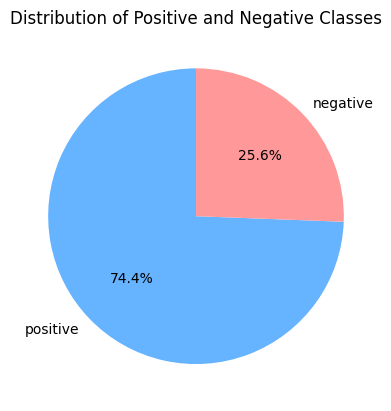

In [62]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]),labels=['positive', 'negative'],
    autopct='%1.1f%%',  # Optional: To show percentages
    startangle=90,  # Optional: To start the pie chart at 90 degrees
    colors=['#66b3ff', '#ff9999']  # Optional: To specify colors
)
plt.title('Distribution of Positive and Negative Classes')
plt.show()

##Handle imbalanced dataset

In [63]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
!pip install --upgrade imbalanced-learn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
print(vectorized_x_train.shape)
print(y_train.shape)


(6336, 1146)
(6336,)


In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)


(9428, 1146) (9428,)


In [67]:
# Convert the NumPy array to a Pandas Series
y_train_smote_series = pd.Series(y_train_smote)

# Now you can use value_counts()
print(y_train_smote_series.value_counts())

label
0    4714
1    4714
Name: count, dtype: int64


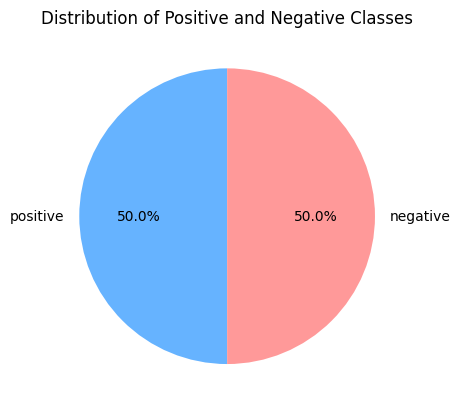

In [68]:
plt.pie(
    np.array([y_train_smote_series.value_counts()[0], y_train_smote_series.value_counts()[1]]),
    labels=['positive', 'negative'],
    autopct='%1.1f%%',  # Show percentages
    startangle=90,  # Start the pie chart at 90 degrees
    colors=['#66b3ff', '#ff9999']  # Specify colors
)
plt.title('Distribution of Positive and Negative Classes')
plt.show()

In [69]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
y_train_smote_series

0       0
1       0
2       0
3       1
4       0
       ..
9423    1
9424    1
9425    1
9426    1
9427    1
Name: label, Length: 9428, dtype: int64

In [71]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
y_test

6292    0
5726    1
7759    1
3876    0
7586    1
       ..
7130    1
3654    1
5522    0
7088    0
5958    0
Name: label, Length: 1584, dtype: int64

## Model tranning and Evaluation 

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [74]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


## Logistic Regression 

In [75]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote , y_train_smote_series)

LogisticRegression()

In [76]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [77]:
y_train_pred

array([0, 0, 0, ..., 1, 1, 1])

In [78]:
y_train_smote_series

0       0
1       0
2       0
3       1
4       0
       ..
9423    1
9424    1
9425    1
9426    1
9427    1
Name: label, Length: 9428, dtype: int64

In [79]:
training_scores(y_train_smote_series, y_train_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.917
	Recall = 0.968
	F1-Score = 0.942


In [84]:
y_test_pred = lr.predict(vectorized_x_test)

In [85]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
y_test

6292    0
5726    1
7759    1
3876    0
7586    1
       ..
7130    1
3654    1
5522    0
7088    0
5958    0
Name: label, Length: 1584, dtype: int64

In [88]:
validation_scores(y_test , y_test_pred)

Testing Scores:
	Accuracy = 0.868
	Precision = 0.696
	Recall = 0.856
	F1-Score = 0.768


In [90]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote , y_train_smote_series)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote_series, y_train_pred)

validation_scores(y_test , y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.917
	Recall = 0.968
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.868
	Precision = 0.696
	Recall = 0.856
	F1-Score = 0.768


## Multinomial Naive Bayes

In [92]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote , y_train_smote_series)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote_series, y_train_pred)

validation_scores(y_test , y_test_pred)

Training Scores:
	Accuracy = 0.909
	Precision = 0.873
	Recall = 0.958
	F1-Score = 0.914
Testing Scores:
	Accuracy = 0.858
	Precision = 0.662
	Recall = 0.906
	F1-Score = 0.765


## Decision Tree Classifier

In [94]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote , y_train_smote_series)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote_series, y_train_pred)

validation_scores(y_test , y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.816
	Precision = 0.65
	Recall = 0.601
	F1-Score = 0.625


## Random Forest Classifier

In [95]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote , y_train_smote_series)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote_series, y_train_pred)

validation_scores(y_test , y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.859
	Precision = 0.732
	Recall = 0.703
	F1-Score = 0.717


## Support Vector Machine  

In [96]:
svm = SVC()
svm.fit(vectorized_x_train_smote , y_train_smote_series)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote_series, y_train_pred)

validation_scores(y_test , y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.872
	Precision = 0.718
	Recall = 0.819
	F1-Score = 0.765


In [98]:
import pickle

with open('../static/model/model.pickle', 'wb')as file:
    pickle.dump(lr, file)